In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Dense, Dropout, UpSampling2D, pooling, Flatten, Conv2D, Reshape, Input, GaussianNoise
from keras.models import Sequential, Model, load_model
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from PIL import Image

Using TensorFlow backend.


In [2]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [3]:
path = './trainning data'
images = []
for image_path in os.listdir(path):
    try:
        image = Image.open(os.path.join(path, image_path)).convert('L')
        # image.show()
        # break
    except OSError:
        continue
    
    image = image.resize((10, 8), Image.ANTIALIAS)
    data = np.asarray(image).ravel()
    data = data / 255
#     print(data.shape)
    images.append(data)
data = np.array(images)
trainset = data[:-20]
testset = data[-20:]

In [4]:
# Fully Connected

encoding_dim = 2

# this is our input placeholder
input_img = Input(shape=(80, ))
noise = GaussianNoise(0.5)(input_img)
dense_0 = Dense(32, activation='relu')(noise)
dense_1 = Dense(16, activation='relu')(dense_0)
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(dense_1)
# "decoded" is the lossy reconstruction of the input
dense_2 = Dense(16, activation='relu')(encoded)
dense_3 = Dense(32, activation='relu')(dense_2)
decoded = Dense(80, activation='sigmoid')(dense_3)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

autoencoder.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80)                0         
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 80)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2592      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                48        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
__________

In [5]:
autoencoder.fit(trainset, trainset, batch_size=32, epochs=100)

Epoch 1/100
3056/3056 [==============================] - 0s 148us/step - loss: 0.0430 - acc: 0.0167
Epoch 2/100
3056/3056 [==============================] - 0s 41us/step - loss: 0.0247 - acc: 0.0252
Epoch 3/100
3056/3056 [==============================] - 0s 50us/step - loss: 0.0236 - acc: 0.0177
Epoch 4/100
3056/3056 [==============================] - 0s 49us/step - loss: 0.0199 - acc: 0.0157
Epoch 5/100
3056/3056 [==============================] - 0s 47us/step - loss: 0.0183 - acc: 0.0177
Epoch 6/100
3056/3056 [==============================] - 0s 49us/step - loss: 0.0177 - acc: 0.0190
Epoch 7/100
3056/3056 [==============================] - 0s 48us/step - loss: 0.0170 - acc: 0.0180
Epoch 8/100
3056/3056 [==============================] - 0s 48us/step - loss: 0.0163 - acc: 0.0173
Epoch 9/100
3056/3056 [==============================] - 0s 44us/step - loss: 0.0153 - acc: 0.0183
Epoch 10/100
3056/3056 [==============================] - 0s 48us/step - loss: 0.0142 - acc: 0.0177
Epoch 11

3056/3056 [==============================] - 0s 44us/step - loss: 0.0100 - acc: 0.0321
Epoch 84/100
3056/3056 [==============================] - 0s 45us/step - loss: 0.0101 - acc: 0.0360
Epoch 85/100
3056/3056 [==============================] - 0s 43us/step - loss: 0.0101 - acc: 0.0334
Epoch 86/100
3056/3056 [==============================] - 0s 45us/step - loss: 0.0102 - acc: 0.0353
Epoch 87/100
3056/3056 [==============================] - 0s 42us/step - loss: 0.0102 - acc: 0.0357
Epoch 88/100
3056/3056 [==============================] - 0s 52us/step - loss: 0.0101 - acc: 0.0347
Epoch 89/100
3056/3056 [==============================] - 0s 42us/step - loss: 0.0101 - acc: 0.0314
Epoch 90/100
3056/3056 [==============================] - 0s 47us/step - loss: 0.0099 - acc: 0.0386
Epoch 91/100
3056/3056 [==============================] - 0s 41us/step - loss: 0.0096 - acc: 0.0311
Epoch 92/100
3056/3056 [==============================] - 0s 41us/step - loss: 0.0100 - acc: 0.0435
Epoch 93/100


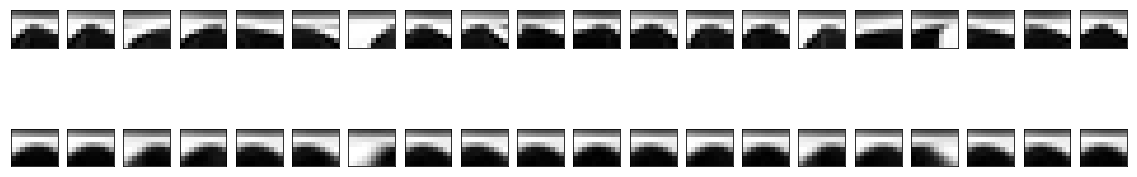

In [6]:
n = 20  # how many pictures
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(testset[i].reshape(8, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(autoencoder.predict(testset[i].reshape(1, -1)).reshape(8, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
autoencoder.save('../models/80-2-80 Autoencoder.h5')
encoder = Model(input_img, encoded)
encoder.save('../models/80-2 Encoder.h5')